In [ ]:
import pandas as pd

train = pd.read_csv('bike_train.csv')
test = pd.read_csv('bike_test.csv')


print("Train dataset info:")
print(train.info())
print("\nTest dataset info:")
print(test.info())

print("\nFirst few rows of train dataset:")
print(train.head())


Train dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   7200 non-null   object 
 1   Rented_Bike_Count      7200 non-null   int64  
 2   Hour                   7200 non-null   int64  
 3   Temperature            7200 non-null   float64
 4   Humidity               7200 non-null   int64  
 5   Wind_speed             7200 non-null   float64
 6   Visibility             7200 non-null   int64  
 7   Dew_point_temperature  7200 non-null   float64
 8   Solar_Radiation        7200 non-null   float64
 9   Rainfall               7200 non-null   float64
 10  Snowfall               7200 non-null   float64
 11  Seasons                7200 non-null   object 
 12  Holiday                7200 non-null   object 
 13  Functioning_Day        7200 non-null   object 
dtypes: float64(6), int64(4), object(4)
m

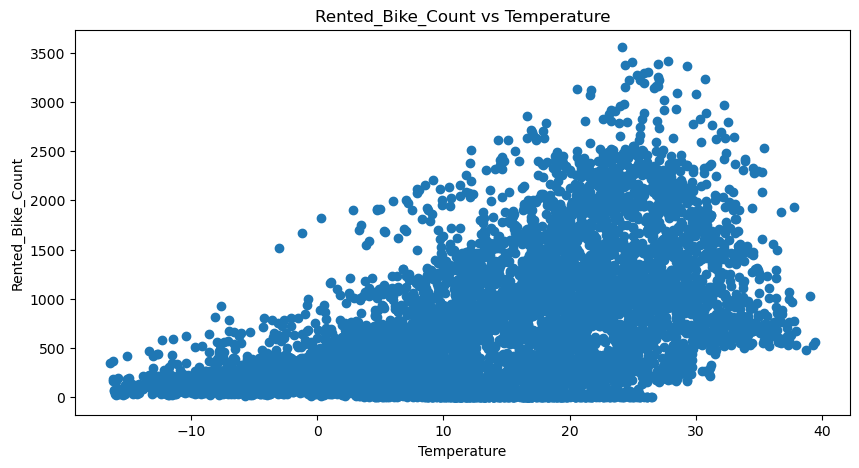

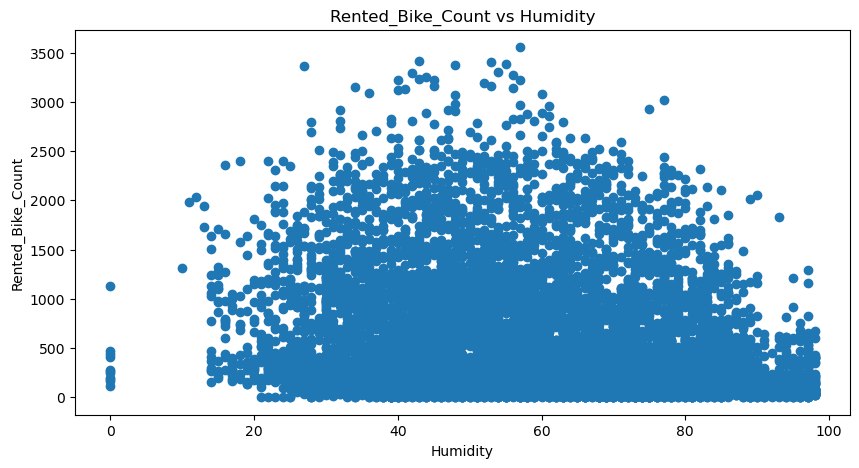

In [ ]:
import matplotlib.pyplot as plt

feature1 = 'Temperature'
feature2 = 'Humidity'

plt.figure(figsize=(10, 5))
plt.scatter(train[feature1], train['Rented_Bike_Count'])
plt.xlabel(feature1)
plt.ylabel('Rented_Bike_Count')
plt.title(f'Rented_Bike_Count vs {feature1}')
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(train[feature2], train['Rented_Bike_Count'])
plt.xlabel(feature2)
plt.ylabel('Rented_Bike_Count')
plt.title(f'Rented_Bike_Count vs {feature2}')
plt.show()


C:\Users\tmawa\AppData\Local\Temp\ipykernel_25808\3570421885.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train.corr()


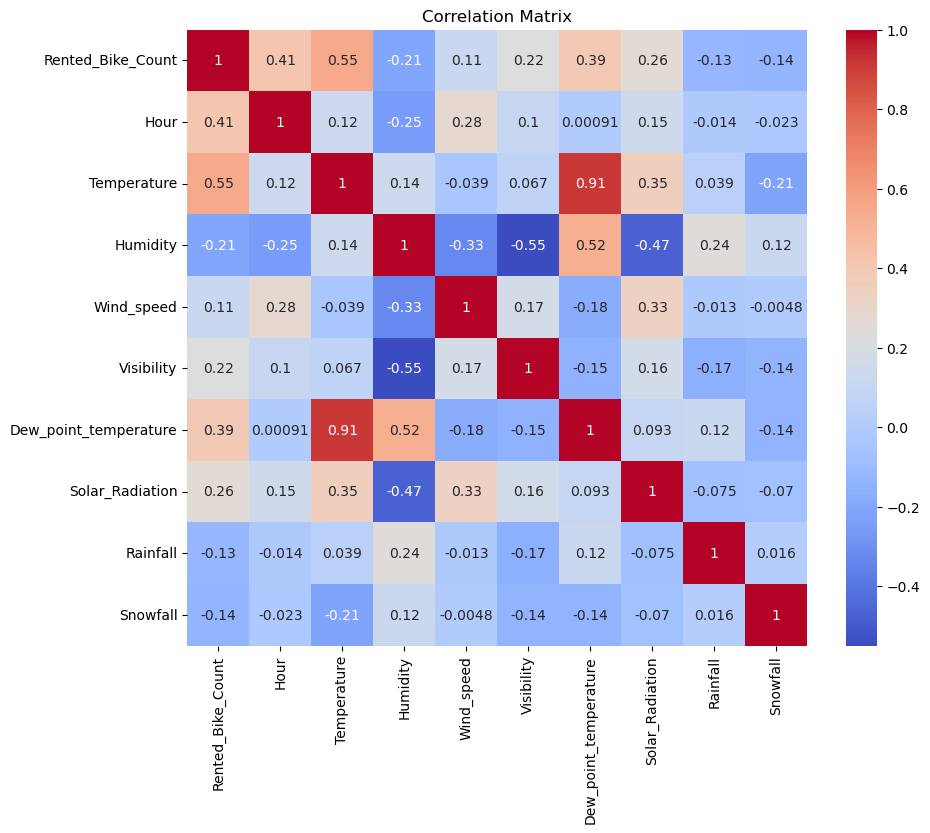

In [ ]:
correlation_matrix = train.corr()

import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_cols = ['Seasons', 'Holiday', 'Functioning_Day']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)],  # Drop first to avoid collinearity
    remainder='passthrough'  # Keep other columns as they are
)

model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

X_train = train.drop(columns=['Date', 'Rented_Bike_Count'])
y_train = train['Rented_Bike_Count']

X_test = test.drop(columns=['Date', 'Rented_Bike_Count'])
y_test = test['Rented_Bike_Count']

model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred)
plt.xlabel('True Rented_Bike_Count')
plt.ylabel('Predicted Rented_Bike_Count')
plt.title('True vs Predicted Rented_Bike_Count')
plt.show()


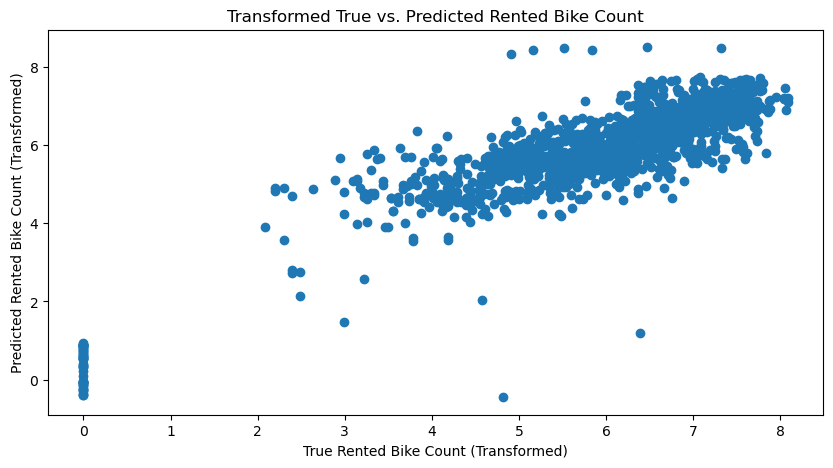

R2 measure of fit: 0.7765751576601063


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

train['Rented_Bike_Count'] = np.log(train['Rented_Bike_Count'] + 1)
test['Rented_Bike_Count'] = np.log(test['Rented_Bike_Count'] + 1)

categorical_cols = ['Seasons', 'Holiday', 'Functioning_Day']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)], 
    remainder='passthrough'  
)

model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

X_train = train.drop(columns=['Date', 'Rented_Bike_Count'])
y_train = train['Rented_Bike_Count']

X_test = test.drop(columns=['Date', 'Rented_Bike_Count'])
y_test = test['Rented_Bike_Count']

model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred)
plt.xlabel("True Rented Bike Count (Transformed)")
plt.ylabel("Predicted Rented Bike Count (Transformed)")
plt.title("Transformed True vs. Predicted Rented Bike Count")
plt.show()

r2 = r2_score(y_test, y_pred)
print(f'R2 measure of fit: {r2}')

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

pairs = [('Temperature', 'Humidity'), ('Hour', 'Temperature'), ('Humidity', 'Hour'), ('Temperature', 'Hour')]

results = []

for pair in pairs:
    poly = PolynomialFeatures(interaction_only=True)
    X_train_poly = poly.fit_transform(train[list(pair)])
    X_test_poly = poly.transform(test[list(pair)])

    lr = LinearRegression()
    lr.fit(X_train_poly, y_train)

    y_pred = lr.predict(X_test_poly)

    r2 = r2_score(y_test, y_pred)

    results.append((pair, r2))

results_df = pd.DataFrame(results, columns=['Feature Pair', 'R2'])
print(results_df)


              Feature Pair        R2
0  (Temperature, Humidity)  0.168402
1      (Hour, Temperature)  0.157539
2         (Humidity, Hour)  0.064078
3      (Temperature, Hour)  0.157539


In [ ]:
features = ['Temperature', 'Humidity', 'Hour', 'Wind_speed']
from sklearn.preprocessing import LabelEncoder
non_numeric_features = ['Seasons', 'Holiday', 'Functioning_Day']
label_encoder = LabelEncoder()

for feature in non_numeric_features:
    train[feature] = label_encoder.fit_transform(train[feature])
    test[feature] = label_encoder.fit_transform(test[feature])

results = []

for feature in features:
    for transformation in [np.log1p, np.sqrt]:
        train_transformed = train.copy()
        test_transformed = test.copy()

        train_transformed[feature] = transformation(train_transformed[feature])
        test_transformed[feature] = transformation(test_transformed[feature])

        X_train = train_transformed.drop(columns=['Date', 'Rented_Bike_Count'])
        y_train = train_transformed['Rented_Bike_Count']
        X_test = test_transformed.drop(columns=['Date', 'Rented_Bike_Count'])
        y_test = test_transformed['Rented_Bike_Count']

        lr = LinearRegression()
        lr.fit(X_train, y_train)

        y_pred = lr.predict(X_test)

        r2 = r2_score(y_test, y_pred)

        results.append((feature, transformation.__name__, r2))

results_df = pd.DataFrame(results, columns=['Feature', 'Transformation', 'R2'])
print(results_df)


In [ ]:
results = []

for feature in features:
    for transformation in [np.log1p, np.sqrt]:
        train_transformed = train.copy()
        test_transformed = test.copy()
        train_transformed[feature] = transformation(train_transformed[feature].clip(0))
        test_transformed[feature] = transformation(test_transformed[feature].clip(0))

        X_train = train_transformed.drop(columns=['Date', 'Rented_Bike_Count'])
        y_train = train_transformed['Rented_Bike_Count']
        X_test = test_transformed.drop(columns=['Date', 'Rented_Bike_Count'])
        y_test = test_transformed['Rented_Bike_Count']

        preprocessor = ColumnTransformer(
            transformers=[
                ('cat', OneHotEncoder(drop='first'), categorical_cols)],
            remainder='passthrough'
        )

        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('model', LinearRegression())
        ])

        pipeline.fit(X_train, y_train)

        y_pred = pipeline.predict(X_test)

        r2 = r2_score(y_test, y_pred)

        results.append((feature, transformation.__name__, r2))

results_df = pd.DataFrame(results, columns=['Feature', 'Transformation', 'R2'])
print(results_df)


       Feature Transformation        R2
0  Temperature          log1p  0.778131
1  Temperature           sqrt  0.779049
2     Humidity          log1p  0.768896
3     Humidity           sqrt  0.768282
4         Hour          log1p  0.765151
5         Hour           sqrt  0.769174
6   Wind_speed          log1p  0.776560
7   Wind_speed           sqrt  0.776570
